# Unit 5 - Financial Planning


In [129]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [130]:
# Load .env enviroment variables
load_dotenv('apikeys.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [131]:
import json

# Set current amount of crypto assets
# YOUR CODE HERE!

my_btc = 1.2
my_eth = 5.3

In [132]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"  # was cad before - changed to 
# USD via documentation

btc_data = requests.get(btc_url)
eth_data = requests.get(eth_url)

# properly formed responses
print(btc_data)
print(eth_data)

# need to convert to json format

btc_json = btc_data.json()
eth_json = eth_data.json()

#print(json.dumps(btc_json, indent=4))
print(json.dumps(eth_json,indent =4))

# format seems reasonable to grab necessary data



<Response [200]>
<Response [200]>
{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 114388934,
            "total_supply": 114388934,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 1351.55,
                    "volume_24h": 37630943929,
                    "market_cap": 154085637042,
                    "percentage_change_1h": 0.280635841718111,
                    "percentage_change_24h": 9.26469175072264,
                    "percentage_change_7d": 9.46958732921066,
                    "percent_change_1h": 0.280635841718111,
                    "percent_change_24h": 9.26469175072264,
                    "percent_change_7d": 9.46958732921066
                }
            },
            "last_updated": 1611527517
        }
    },
    "metadata": {
        "timesta

In [133]:
# Fetch current BTC price
# YOUR CODE HERE!

current_btc = btc_json['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
# YOUR CODE HERE!]
current_eth = eth_json['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
# YOUR CODE HERE!

my_btc_value = my_btc * current_btc
my_eth_value = my_eth * current_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $38439.60
The current value of your 5.3 ETH is $7163.21


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [134]:
# Current amount of shares
# YOUR CODE HERE!

my_agg = 200
my_spy = 50

In [135]:
# Set Alpaca API key and secret
# YOUR CODE HERE!


alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")



In [136]:
# Format current date as ISO format
# YOUR CODE HERE!

today = pd.Timestamp("2020-01-20", tz="America/New_York").isoformat()
tomorrow = pd.Timestamp("2020-01-21", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!

df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = tomorrow
).df

# Display sample data

df_portfolio
# Preview DataFrame
# YOUR CODE HERE!
df_portfolio.head()



AGG                                     SPY  \
                             open    high     low   close   volume   open   
time                                                                        
2020-01-21 00:00:00-05:00  113.25  113.41  113.22  113.37  7641226  330.9   

                                                              
                             high     low   close     volume  
time                                                          
2020-01-21 00:00:00-05:00  332.18  330.82  331.31  100931060

In [137]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

df_closing_prices['AGG'] = df_portfolio["AGG"]["close"]
df_closing_prices['SPY'] = df_portfolio["SPY"]["close"]

df_closing_prices.head()

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data

df_closing_prices.columns

df_closing_prices.head()

agg_close_price = df_closing_prices['AGG'][0]
spy_close_price = df_closing_prices['SPY'][0]


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")



Current AGG closing price: $113.37
Current SPY closing price: $331.31


In [138]:
# Compute the current value of shares
# YOUR CODE HERE!

my_spy_value = my_spy*spy_close_price
my_agg_value = my_agg*agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16565.50
The current value of your 200 AGG shares is $22674.00


### Savings Health Analysis

In [139]:
# Set monthly household income
# YOUR CODE HERE!

monthly_income = 12000

# Create savings DataFrame
# YOUR CODE HERE!

data = {'amount': [my_spy_value,my_agg_value]}

df_savings = pd.DataFrame(data, index = ['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,16565.5
shares,22674.0


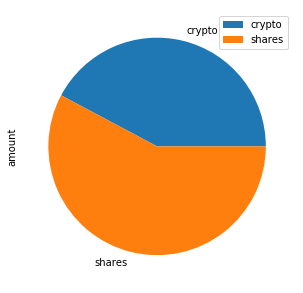

In [140]:
# Plot savings pie chart
# YOUR CODE HERE!

df_savings.plot.pie(y='amount',figsize =(5,5))

In [141]:
# Set ideal emergency fund
emergency_fund = monthly_income *3

# Calculate total amount of savings
# YOUR CODE HERE!

total_savings = df_savings['amount'].sum()



# Validate saving health
# YOUR CODE HERE!

if total_savings> emergency_fund:
    print('Congrats you have enough savings in your emergency fund!')
elif total_savings == emergency_fund:
    print('Good job- you have reached your saving goal.')
else: 
    print(f"The current value of your savings ${total_savings:0.2f} is insufficient by ${emergency_fund-total_savings:0.2f}")

Congrats you have enough savings in your emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [142]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-01-21', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-01-21', tz='America/New_York').isoformat()

In [143]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

df_5_years = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_5_years.head()

# some work needs to still be done here-  i hate multi-index 

df_closing_prices_5_year = pd.DataFrame()

df_closing_prices_5_year['AGG'] = df_5_years["AGG"]["close"]
df_closing_prices_5_year['SPY'] = df_5_years["SPY"]["close"]


# Drop the time component of the date
df_closing_prices_5_year.index = df_closing_prices_5_year.index.date

df_closing_prices_5_year.head()

,AGG,SPY
2015-01-21,111.5000,203.09
2015-01-22,111.4299,206.09
2015-01-23,111.7400,204.95
2015-01-26,111.6500,205.46
2015-01-27,111.6300,202.75


In [152]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_fiveyear = MCSimulation(
    portfolio_data = df_5_years,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [153]:
# Printing the simulation input data
# YOUR CODE HERE!

MC_fiveyear.portfolio_data.head()

AGG                                         \
                             open    high       low     close     volume   
time                                                                       
2015-01-21 00:00:00-05:00  111.68  111.81  111.3901  111.5000  1916736.0   
2015-01-22 00:00:00-05:00  111.72  111.72  111.2900  111.4299  1868700.0   
2015-01-23 00:00:00-05:00  111.65  111.81  111.5400  111.7400  1449774.0   
2015-01-26 00:00:00-05:00  111.79  111.79  111.4500  111.6500  2477962.0   
2015-01-27 00:00:00-05:00  111.97  111.97  111.5450  111.6300  1538783.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-01-21 00:00:00-05:00          NaN  201.50  203.66  200.94  203.09   
2015-01-22 00:00:00-05:00    -0.000629  203.99  206.26  202.33  206.09   
2015-01-23 00:00:00-05:00     0.002783  205.79  206.10  204.81  204.95   
2015-01-26 00:00:00-05:00    -0.000805  204.71  205.56  203.85  205.46   
2015-01-27 00:00:00-05:00    -0.000179  202.97  204.12  201.74  202.75   

                                                   
                              volume daily_return  
time                                               
2015-01-21 00:00:00-05:00  106170094          NaN  
2015-01-22 00:00:00-05:00  124570218     0.014772  
2015-01-23 00:00:00-05:00   90576108    -0.005532  
2015-01-26 00:00:00-05:00   71274935     0.002488  
2015-01-27 00:00:00-05:00  109506387    -0.013190

In [154]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989025,1.005814,0.991115,0.998861,0.998868,0.992945,0.999185,1.000320,1.014119,1.006009,...,1.002251,0.999659,0.995885,1.006394,1.000435,1.008840,0.999877,1.006627,0.993232,0.997183
2,0.997606,1.013778,0.973501,0.994138,0.995417,1.002553,0.994070,1.003160,1.014347,1.005680,...,1.010011,1.003292,1.006075,0.991871,1.015062,1.009566,0.996106,1.013188,0.987196,0.989051
3,0.986186,1.010381,0.981304,0.987783,1.001203,1.011766,0.991196,1.002505,1.004979,1.011288,...,1.004607,1.005969,0.998915,0.987777,1.013206,1.010013,1.000227,1.008754,0.995403,0.983058
4,0.990209,1.009641,0.985890,0.975774,1.008083,1.010139,0.985797,0.998968,1.009790,1.023897,...,1.016514,1.006220,0.998845,0.997180,1.011927,1.006096,0.990966,1.018856,0.990082,0.975565
5,0.995741,1.010809,0.971982,0.966958,1.010113,1.007941,0.988300,1.001920,1.008965,1.029463,...,1.014429,1.000242,1.002312,1.003432,1.013608,1.011689,0.980840,1.022275,0.991571,0.979450
6,0.996493,1.010016,0.966565,0.967243,0.983333,1.004816,0.984902,1.002586,1.000363,1.036680,...,1.016436,0.999753,1.012656,0.992634,1.011549,1.000320,0.971824,1.018015,0.984311,0.976109
7,0.999243,1.002493,0.956247,0.969538,0.973468,1.004127,0.986156,1.003962,0.995069,1.028242,...,1.002472,0.985434,1.003473,0.989043,1.007189,1.001137,0.973571,1.014670,0.986548,0.978769
8,0.997630,1.012001,0.950362,0.972524,0.973364,1.013063,0.978171,1.000705,0.998389,1.023253,...,1.007925,0.986568,0.996854,0.981291,1.001836,0.997444,0.987182,1.011100,0.990748,0.976426
9,1.000366,1.008541,0.946722,0.977137,0.971789,1.010162,0.976666,1.001877,0.990432,1.022794,...,0.997721,0.984537,0.988834,0.988581,1.000499,1.005245,0.996642,1.012338,0.988651,0.986184


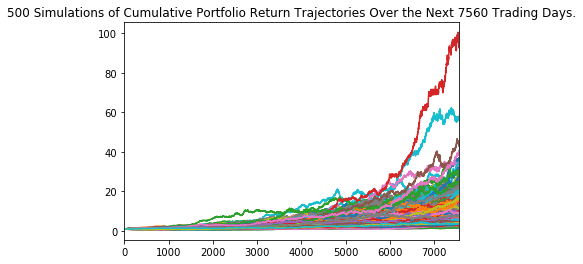

In [158]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot = MC_fiveyear.plot_simulation()

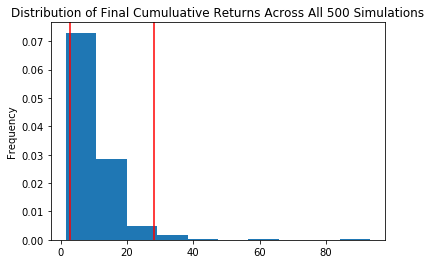

In [160]:
# Plot probability distribution and confidence intervals

dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')



### Retirement Analysis

In [164]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!

print(tbl)

count           500.000000
mean             10.167989
std               7.444334
min               1.568471
25%               5.582047
50%               8.201726
75%              12.525577
max              93.348410
95% CI Lower      2.815484
95% CI Upper     28.157204
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [165]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $28154.84 and $281572.04
There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $28154.84 and $281572.04


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [166]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $84464.52 and $844716.11
There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $84464.52 and $844716.11


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")